In [65]:
import category_encoders as ce
import numpy as np
import pandas as pd

from sklearn.linear_model import PassiveAggressiveClassifier,PassiveAggressiveRegressor
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingRegressor, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [66]:
def positive_negative (v):
    if float(v) >= 0:
        return 1
    else:
        return 0

In [103]:
df_data_reg = pd.read_csv('GapUp8_jones_Training.csv', header=0, encoding='ascii', engine='python')

df_data = pd.read_csv('GapUp8_jones_Training.csv', header=0, encoding='ascii', engine='python')
df_data['Pchange'] = df_data['Pchange'].map(positive_negative)

In [104]:
print(df_data.head())
len(df_data)

print(df_data_reg.head())
len(df_data_reg)

          Mcap  Float    jonesP      Gap0      Gap1  Pchange1  V_1_Float  \
0   416.295000  12.93  0.001993  0.983655  0.442149  0.928367   0.656729   
1  1603.181979  52.28 -0.021264  0.984127 -0.066351 -0.200508   0.001503   
2   122.760000   1.61  0.001993  0.270103  0.364679 -0.184874   1.137329   
3   453.320000   9.16 -0.031881  0.729508 -0.007576 -0.068702   0.006987   
4  1735.233023  45.86  0.001962  0.739130  0.012121 -0.035928   0.000052   

    V_Float  Pchange  
0  0.402707        0  
1  0.010788        0  
2  0.567702        0  
3  0.349913        0  
4  0.020403        0  
          Mcap  Float    jonesP      Gap0      Gap1  Pchange1  V_1_Float  \
0   416.295000  12.93  0.001993  0.983655  0.442149  0.928367   0.656729   
1  1603.181979  52.28 -0.021264  0.984127 -0.066351 -0.200508   0.001503   
2   122.760000   1.61  0.001993  0.270103  0.364679 -0.184874   1.137329   
3   453.320000   9.16 -0.031881  0.729508 -0.007576 -0.068702   0.006987   
4  1735.233023  45.86  0.

41194

In [105]:
X = np.array(df_data.drop(['Pchange'],1))
y = np.array(df_data['Pchange'])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2)

In [106]:
import numpy as np
import matplotlib.pyplot as plt

#ExtraTrees
clf = ExtraTreesClassifier(n_estimators=250,random_state=0).fit(X_train,y_train)
print ('classification score: %s'%(clf.score(X_test, y_test)))
clfExtra = ExtraTreesClassifier (n_estimators=250,random_state=0).fit(X,y)

importances = clfExtra.feature_importances_
std = np.std([tree.feature_importances_ for tree in clfExtra.estimators_],
             axis=0)
indices = np.argsort(importances)

classification score: 0.7085811384876806


### Gap Up Variable importance

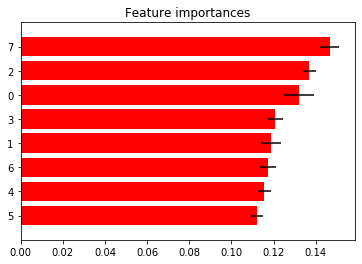

In [107]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importances[indices],
       color="r", xerr=std[indices], align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(X.shape[1]), indices)
plt.ylim([-1, X.shape[1]])
plt.show()
#FRD: Mkt_Cap	Float	Gap0	pC_1	pC_2	pC_3	V_P 	V1_P	V2_P	V3_P
#Gap7: Mkt_Cap	Float	Gap0	Gap1	pC_1	V1_P 	V_P
#Gap8: Mkt_Cap	Float	JonesP	Gap0	Gap1	pC_1	V1_P 	V_P
#GapUpDown: Mcap	Float	Gap0	Gap1	Gap2	Pchange1	Pchange2	Pchange3	V_1_Float	V_2_Float	V_3_Float	V_Float	Pchange

### First Red Day Variable importance

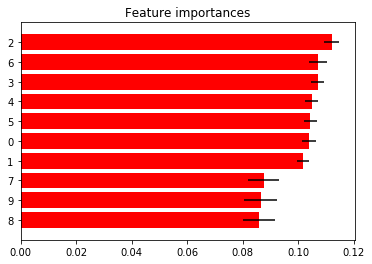

In [70]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importances[indices],
       color="r", xerr=std[indices], align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(X.shape[1]), indices)
plt.ylim([-1, X.shape[1]])
plt.show()
#FRD: Mkt_Cap	Float	Gap0	pC_1	pC_2	pC_3	V_P 	V1_P	V2_P	V3_P
#Gap: Mkt_Cap	Float	Gap0	pC_1	V_P 	V1_P
#GapUpDown: Mcap	Float	Gap0	Gap1	Gap2	Pchange1	Pchange2	Pchange3	V_1_Float	V_2_Float	V_3_Float	V_Float	Pchange

In [84]:
#Gradiant Boosting Ensemble learning
clf = GradientBoostingClassifier(learning_rate= 0.1, n_estimators= 250, max_depth= 11).fit(X_train,y_train)
print ('classification score: %s'%(clf.score(X_test, y_test)))
clfP = GradientBoostingClassifier (learning_rate= 0.1, n_estimators= 250, max_depth= 11).fit(X,y)

classification score: 0.6806651292632601


In [85]:
#regression prep
X = np.array(df_data_reg.drop(['Pchange'],1))
y = np.array(df_data_reg['Pchange'])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2)

#Gradiant Boosting Ensemble learning
clf = GradientBoostingRegressor(learning_rate= 0.1, n_estimators= 250, max_depth= 11).fit(X_train,y_train)
print ('regression score: %s'%(clf.score(X_test, y_test)))
clfP_reg = GradientBoostingRegressor (learning_rate= 0.1, n_estimators= 250, max_depth= 11).fit(X,y)

regression score: 0.15314673503561693


In [86]:
#pickling predictors
import pickle as pk

with open('GAP7_GB_Classifier.p','wb') as f:
    pk.dump(clfP,f)
with open('GAP7_ET_Classifier.p','wb') as f:
    pk.dump(clfExtra,f)
with open('GAP7_GB_Regressor.p','wb') as f:
    pk.dump(clfP_reg,f)

## Morning Predictions

In [1]:
#pickling predictors
import pickle as pk

clfP = pk.load(open('GAP7_GB_Classifier.p','rb'))
clfExtra = pk.load(open('GAP7_ET_Classifier.p','rb'))
clfP_reg = pk.load(open('GAP7_GB_Regressor.p','rb'))

In [27]:
import datetime
import time
import requests

import json
import pandas as pd
import numpy as np

from datetime import date, timedelta
def prev_weekday(adate):
    '''subtract a day from the given date, then check if the date is a weekday. 
    If not, subtract another, until you do have a weekday'''
    adate -= timedelta(days=1)
    while adate.weekday() > 4: # Mon-Fri are 0-4
        adate -= timedelta(days=1)
    return adate

def symbol_downloader(symbol, days=10, days_ago=0):
    '''take symbol and return volume and price change'''
    dt = datetime.datetime.now()
    UnixTime = int(time.mktime(dt.timetuple()))
    #web variables
    url = 'https://query1.finance.yahoo.com/v8/finance/chart/'+symbol+'?period1='+str(UnixTime-86400*(days+days_ago))+'&period2='+str(UnixTime-86400*days_ago)+'&interval=1d&indicators=quote%7Csma~60%7Cmfi~14&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-CA&region=CA&corsDomain=ca.finance.yahoo.com'
    #proxies
    http_proxy  = ''
    https_proxy = ''
    ftp_proxy   = ''
    proxyDict = { 
                  "http"  : http_proxy, 
                  "https" : https_proxy, 
                  "ftp"   : ftp_proxy
                }

    hdr = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2272.101 Safari/537.36',
       'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
       'Connection': 'keep-alive'}
    
    try:
        resp = requests.get(url, headers=hdr)
        if resp.status_code != 200:
            # This means something went wrong.
            print(resp.status_code)
        data = json.loads(resp.text)
        #json unpack
        timestamp = data['chart']['result'][0]['timestamp']
        timestamp = [datetime.datetime.fromtimestamp(x).strftime('%Y%m%d') for x in timestamp]
        quote = data['chart']['result'][0]['indicators']['quote'][0]
#         sma60 = data['chart']['result'][0]['indicators']['sma'][0]['sma']
        stock_df = pd.DataFrame(quote)
        #index is symbol and timestamp
        stock_df.index = [str(x) for x in timestamp]
        
        stock_df = stock_df.dropna()
        stock_df = stock_df[~(stock_df == np.inf).any(axis=1)]
        #if request returns legit values
        if len(stock_df) != 0:
            return stock_df
                
    except requests.exceptions.RequestException as e:  # This is the correct syntax
        raise SystemExit(e)

def symbol_downloader_intraday(symbol, days=5, days_ago=0):
    '''returns intraday stock data'''
    dt = datetime.datetime.now()
    UnixTime = int(time.mktime(dt.timetuple()))
    #web variables
    url = 'https://query1.finance.yahoo.com/v8/finance/chart/'+symbol+'?period1='+str(UnixTime-86400*(days+days_ago))+'&period2='+str(UnixTime-86400*days_ago)+'&interval=5m&indicators=quote%7Csma~60%7Cmfi~8&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-CA&region=CA&corsDomain=ca.finance.yahoo.com'
    #proxies
    http_proxy  = ''
    https_proxy = ''
    ftp_proxy   = ''
    proxyDict = { 
                  "http"  : http_proxy, 
                  "https" : https_proxy, 
                  "ftp"   : ftp_proxy
                }

    hdr = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2272.101 Safari/537.36',
       'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
       'Connection': 'keep-alive'}
    
    try:
        resp = requests.get(url, headers=hdr)
        if resp.status_code != 200:
            # This means something went wrong.
            print(resp.status_code)
        data = json.loads(resp.text)
        #json unpack
        timestamp_raw = data['chart']['result'][0]['timestamp']
        timestamp = [datetime.datetime.fromtimestamp(x).strftime('%Y%m%d') for x in timestamp_raw]
        HH = [datetime.datetime.fromtimestamp(x).strftime('%H') for x in timestamp_raw]
        MM = [datetime.datetime.fromtimestamp(x).strftime('%M') for x in timestamp_raw]
        quote = data['chart']['result'][0]['indicators']['quote'][0]
        stock_df = pd.DataFrame(quote)
        #index is symbol and timestamp
        stock_df.index = [str(x) for x in timestamp]
        
        stock_df['hh'] = HH
        stock_df['mm'] = MM
        
        stock_df = stock_df.dropna()
        stock_df = stock_df[~(stock_df == np.inf).any(axis=1)]
        #if request returns legit values
        if len(stock_df) != 0:
            return stock_df
        
    except requests.exceptions.RequestException as e:  # This is the correct syntax
        raise SystemExit(e)

def txt_to_float (amount): 
    '''
    Take text large number with letter suffix, and turn into float
    '''
    try: 
        num_amount = 0.00
        quant = amount[-1]
        amount = amount[:-1]
        if quant == 'T': 
            num_amount = float(amount) * 1000000000000
        elif quant == 'B': 
            num_amount = float(amount) * 1000000000
        elif quant == 'M':
            num_amount = float(amount) * 1000000
        elif quant == 'K':
            num_amount = float(amount) * 1000
        else: 
            num_amount = float(amount)
        return num_amount
    except:
        return 0

In [54]:
print (symbol_downloader_intraday('BOXL').tail(10))

          open   close  high     low  volume  hh  mm
20200717  3.49  3.4701  3.50  3.4700       0  19  10
20200717  3.47  3.5300  3.53  3.4699       0  19  15
20200717  3.52  3.5300  3.54  3.5000       0  19  20
20200717  3.50  3.5200  3.52  3.5000       0  19  25
20200717  3.52  3.5200  3.53  3.5200       0  19  30
20200717  3.52  3.5400  3.54  3.5200       0  19  35
20200717  3.53  3.4600  3.53  3.4600       0  19  40
20200717  3.46  3.4900  3.49  3.4600       0  19  45
20200717  3.47  3.4900  3.53  3.4700       0  19  50
20200717  3.49  3.4700  3.49  3.4700       0  19  55


In [63]:
import finviz
import gc
gc.collect()

#date variables
dateTday = date.today().strftime('%Y%m%d')
dateYday = prev_weekday(date.today()).strftime('%Y%m%d')
date2day = prev_weekday(prev_weekday(date.today())).strftime('%Y%m%d')

#stock variables
symbol_list = ['BOXL']

for s in symbol_list: 
    #stock dataframes
    symbol_df = symbol_downloader(s)
    intraday_symbol_df = symbol_downloader_intraday (s)
    tday_df = intraday_symbol_df.loc[dateTday]
    yday_df = intraday_symbol_df.loc[dateYday]

    #daily data
    vol_yday = symbol_df.loc[dateYday,'volume']/1000000
    yday_close = symbol_df.loc[dateYday,'close']
    yday_open = symbol_df.loc[dateYday,'open']
    pChange_yday = (yday_close-yday_open)/yday_open

    #Pre market volume today 
    Pre_Mkt_Vol = tday_df.loc[tday_df['hh'].isin(['07','08','09']),'volume'].sum()
    #get latest pre mkt price today after 0900
    tday_open = list(tday_df.loc[(tday_df['hh'].isin(['09']) & tday_df['mm'].isin(['00','05','10','15','20','25','30'])),'open'])[-1]

    #current market cap
    MarketCap = txt_to_float(finviz.get_stock(symbol)['Market Cap'])/1000000
    #Current float
    Float = txt_to_float(finviz.get_stock(symbol)['Shs Float'])/1000000
    #yesterday's Gapup
    gapUp1 = (symbol_df.loc[dateYday,'open']-symbol_df.loc[date2day,'close'])/symbol_df.loc[date2day,'close']
    #price increase yesterday - open to close
    pC_1 = pChange_yday
    #volume yesterday as a % of Float
    V1_P = vol_yday/Float

    #gap up from close yesterday 
    gapUp = (tday_open - yday_close) / yday_close
    #volume expected today as a % of Float
    V_P = Pre_Mkt_Vol*10/1000000/Float

    #gapUp = (symbol_df.loc[dateTday,'open']-symbol_df.loc[dateYday,'close'])/symbol_df.loc[dateYday,'close'] #for use intraday
    #V_P = symbol_df.loc[dateTday,'volume']/1000000/Float #for after market use

    print ('Mkt Cap of {} is: {}'.format(s,MarketCap))
    print ('Float of {} is: {}'.format(s,Float))
    print ('Gap up today of {} is: {}'.format(s,gapUp))
    print ('Gap up yesterday of {} is: {}'.format(s,gapUp1))
    print ('Price change yesterday of {} is: {}'.format(s,pC_1))
    print ('V yesterday of {} is: {}'.format(s,V1_P))
    print ('V today prediction of {} is: {}'.format(s,V_P))

    predict_list = [MarketCap,Float,gapUp,gapUp1,pC_1,V1_P,V_P]
    #Gap7: Mkt_Cap	Float	Gap0	Gap1	pC_1	V1_P 	V_P
    
    #Float(M), MktCap(M), Yday_v_float, Tday_v_float
    print('Gradiant Boosting classification: {}, probabilities: {}'.format(clfP.predict([predict_list]),clfP.predict_proba([predict_list])))
    print('Extra Tree classification: {}, probabilities: {}'.format(clfExtra.predict([predict_list]),clfExtra.predict_proba([predict_list])))
    print('Gradiant Boosting regression: {}'.format(clfP_reg.predict([predict_list])))
    print('-----------------------------------------------------------------------------')

Mkt Cap of BOXL is: 133.81
Float of BOXL is: 11.77
Gap up today of BOXL is: 0.09809267739251415
Gap up yesterday of BOXL is: -0.040476096946902365
Price change yesterday of BOXL is: -0.08933005329335317
V yesterday of BOXL is: 4.981529311809686
V today prediction of BOXL is: 17.582539507221753
Gradiant Boosting classification: [1], probabilities: [[0.4069778 0.5930222]]
Extra Tree classification: [1], probabilities: [[0.384 0.616]]
Gradiant Boosting regression: [-0.00062712]
-----------------------------------------------------------------------------
Mkt Cap of VUZI is: 133.81
Float of VUZI is: 11.77
Gap up today of VUZI is: 0.04379557724848726
Gap up yesterday of VUZI is: 0.02386632536203491
Price change yesterday of VUZI is: -0.0419580023168284
V yesterday of VUZI is: 0.2810705182667799
V today prediction of VUZI is: 1.380818181818182
Gradiant Boosting classification: [1], probabilities: [[0.04037029 0.95962971]]
Extra Tree classification: [1], probabilities: [[0.392 0.608]]
Gradian

In [6]:
'''
Backlog: 
-Enable auto logging of predictions with timestamp
-Enable auto scraping of up to date training data
-automate morning screener: https://www.chartmill.com/chartmill-rest/screener/?sort=((preMarketLast/close)%20-%201)%20*%20100&sorting=DESC&conditions=freeFloat%3C50000000,shares*close%3C300000000,shares*close%3E50000000,smaVolume50%20%3E%20200000,etf=0,(preMarketVolume%3E100000)&exchanges=125,119,3&start=0
'''

'\nBacklog: \n-Enable scraping of predictive features from just entering Ticker symbol\n-Enable auto scraping of up to date training data\n'